In [1]:
import numpy as np
import tensorflow  as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Use Carefully



In [2]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [3]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 16
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

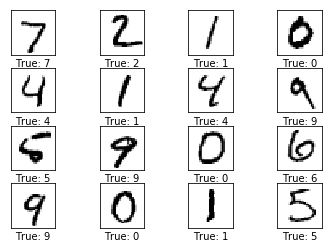

In [4]:
# Get the first images from the test-set
img_size = 28
img_shape = (img_size, img_size)
images = data.x_test[0:16]

# Get the true classes for those images.
cls_true = data.y_test_cls[0:16]

# Plot the images and labels using our helper-function above.
plot_images(images=images,cls_true = cls_true)

In [5]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

In [6]:
filter_size1 = 5
num_filter1 = 16
filter_size2 = 5
num_filter2 = 36
fc_size = 128

In [7]:
img_size = data.img_size
img_size_flat = data.img_size_flat
num_channels = data.num_channels
num_classes = data.num_classes


In [8]:
def weights(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev= 0.05))

def bias(length):
    return tf.Variable(tf.constant(0.05,shape = [length]))


In [9]:
def conv_layer(input,num_input_channels,filter_size,num_filter,use_pool = True):
    
    shape = [filter_size,filter_size,num_input_channels,num_filter]
    weight = weights(shape=shape)
    biased = bias(length = num_filter)
    output = tf.nn.conv2d(input = input,filter = weight,strides = [1,1,1,1],padding = 'SAME')
    output += biased
    if use_pool :
        output = tf.nn.max_pool(value=output,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
    
    output = tf.nn.relu(output) 
    return output

In [10]:
def flat(output):
    output_shape = output.get_shape()
    num_features = output_shape[1:4].num_elements()
    output1 = tf.reshape(output,[-1,num_features])
    
    return output1,num_features


In [11]:
def fc_layer(input,num_input,num_output,use_relu = True):
    shape = [num_input,num_output]
    weight = weights(shape = shape)
    biasis = bias(length = num_output)
    
    answer = tf.matmul(input,weight)+ biasis
    if use_relu:
        answer = tf.nn.relu(answer)
        
    return answer


In [12]:
x = tf.placeholder(tf.float32,[None,img_size_flat])
x_redefined = tf.reshape(x,[-1,img_size,img_size,num_channels])

y = tf.placeholder(tf.float32,[None,num_classes])
yint = tf.argmax(y,axis=1)

In [13]:
answer69 = \
conv_layer(input =x_redefined,num_input_channels = num_channels,filter_size =filter_size1,num_filter =num_filter1,use_pool =True)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
answer69

<tf.Tensor 'Relu:0' shape=(?, 14, 14, 16) dtype=float32>

In [15]:
answer6969 = \
conv_layer(input =answer69 , num_input_channels = num_filter1 , filter_size =filter_size2 , num_filter =num_filter2 , use_pool =True)

In [16]:
answer6969

<tf.Tensor 'Relu_1:0' shape=(?, 7, 7, 36) dtype=float32>

In [17]:
answer70,answer71 =\
flat(answer6969)

In [18]:
answer70

<tf.Tensor 'Reshape_1:0' shape=(?, 1764) dtype=float32>

In [19]:
answer71

1764

In [20]:
answer1999 =\
fc_layer(input = answer70,num_input =answer71 ,num_output = fc_size ,use_relu = True)

In [21]:
answer1999


<tf.Tensor 'Relu_2:0' shape=(?, 128) dtype=float32>

In [22]:
answer2000 = \
fc_layer(input = answer1999,num_input = fc_size,num_output = num_classes,use_relu = True)

In [23]:
answer2000

<tf.Tensor 'Relu_3:0' shape=(?, 10) dtype=float32>

In [24]:
yPred = tf.nn.softmax(answer2000)
yPredint = tf.argmax(yPred,axis = 1)

In [25]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=answer2000, labels=y)
cost = tf.reduce_mean(cross_entropy)

In [26]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [27]:
pred = tf.equal(yint,yPredint)

In [28]:
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [29]:
session = tf.Session()

session.run(tf.global_variables_initializer())

batch_size = 64


In [30]:
def optimum(iteration):

    for i in range(iteration):
        #x_batch, y_batch,_ = data.train.next_batch(batch_size)

        x_batch,y_batch,_ = data.random_batch(batch_size=batch_size)
        
        feed_dict_train = {x:x_batch,y:y_batch}
        session.run(optimizer,feed_dict_train)
    
feed_dict_test = {x: data.x_test,
                  y: data.y_test}

In [31]:
def plot_example_errors(cls_pred, correct):
    
  
    # Negate the boolean array for incorrect images.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 16 images.
    plot_images(images=images[0:16],
                cls_true=cls_true[0:16],
                cls_pred=cls_pred[0:16])


In [32]:
def plot_correct_examples(cls_pred, correct):

    
    # Get the images from the test-set that have been correctly classified.
    
    images = data.x_test[correct]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[correct]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[correct]
    
    # Plot the first 25 images.
    plot_images(images=images[0:16],
                cls_true=cls_true[0:16],
                cls_pred=cls_pred[0:16])


In [33]:
test_batch_size = 64

def print_test_accuracy(show_example_errors=False,
                        show_correct_examples=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = data.num_test

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.x_test[i:j, :]

        # Get the associated labels.
        labels = data.y_test[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(yPredint, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.y_test_cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    #for plotting  incorrect images.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
        
    #for plotting the correct images.    
    if show_correct_examples:
        
        print("Correct Exampl:")
        plot_correct_examples(cls_pred, correct)




In [34]:
def accuracym():
    acc = session.run(accuracy,feed_dict_test)
    print(acc)

In [35]:
accuracym()

0.0939


In [36]:
optimum(iteration =99)
accuracym()
#dont run after this This Laptop will shut down

0.6625


In [37]:
optimum(iteration = 900)
accuracym()

0.8462


Accuracy on Test-Set: 66.2% (6625 / 10000)
Example errors:


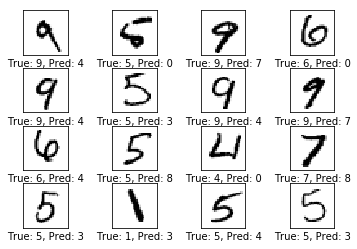

Correct Exampl:


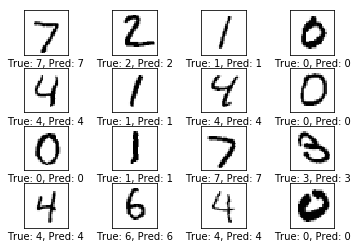

In [37]:
print_test_accuracy(show_example_errors=True,show_correct_examples = True)

In [39]:
%%time

optimum(iteration = 9000)
accuracym()

0.9863
Wall time: 5min 47s


**An Accuracy of 98.63%**

Accuracy on Test-Set: 98.6% (9863 / 10000)
Example errors:


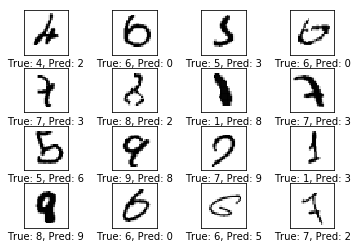

Correct Exampl:


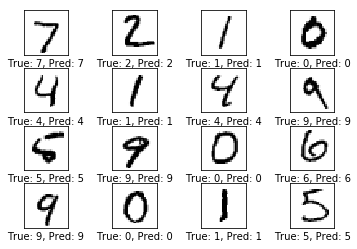

In [42]:
print_test_accuracy(show_example_errors=True,show_correct_examples=True)